#Loading the necessary packages first

In [10]:
import numpy as np
import matplotlib.pyplot as pyplot
%load_ext memory_profiler

#defining variables that will remain unchanged

In [2]:
g=9.81 #gravitational acc. of Earth

In [3]:
#function converts yards to meters
#input: distance in yards
#output: distance in meters
def convert_yards_to_meters(dist_in_yards):
    return dist_in_yards*0.9144

#function converts ft/s to m/s
#input: velocity in ft/s
#output: velocity in m/s
def convert_feet_per_s_to_meters_per_s(vel_in_feet):
    return vel_in_feet*0.3048

#function converts feet to meters
#input: height in feet
#output: height in meters
def convert_feet_to_meters(length_in_feet):
    return length_in_feet*0.3048

#function calculates the height the ball has at the field goal
#input: distance in yards, kick velocity in ft/s, kick angle in deg
#output: height in meters
def height_at_field_goal(kick_velocity_in_feet_per_second, kick_angle_in_degrees, kick_distance_in_yards):
    kick_distance_metric=convert_yards_to_meters(kick_distance_in_yards) #converts yards in meters
    kick_velocity_metric=convert_feet_per_s_to_meters_per_s(kick_velocity_in_feet_per_second) # ft/s => m/s
    kick_angle=np.deg2rad(kick_angle_in_degrees) # degrees to radians
    ##next line calculates the height
    h=np.tan(kick_angle)*kick_distance_metric-0.5*g*kick_distance_metric**2.0/(kick_velocity_metric*np.cos(kick_angle))**2.0
    return h

#function decides whether kick was a success or not
#input: distance in yards, kick velocity in ft/s, kick angle in deg
#output: kick was a success = 0, kick was a failure =1
def kick_success(kick_velocity_in_feet_per_second, kick_angle_in_degrees, kick_distance_in_yards):
    height=height_at_field_goal(kick_velocity_in_feet_per_second, kick_angle_in_degrees, kick_distance_in_yards)
    if height > convert_feet_to_meters(10.0):
        #print("successful attempt")#
        return 0
    else:
        #print("failed attempt")#
        return 1

modify code from last homework in terms of naming

In [4]:
#function plots the kick result velocity vs. angle
# input: distance in yards, kick velocity in ft/s, kick angle in deg
#output: a point in v vs. theta graph 
def plotting_successes_failures_constant_distance(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, plot_kick_distance_in_yards):
    if kick_success(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, plot_kick_distance_in_yards)==0:
        pyplot.plot(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, 'o',color='green')
    else:
        pyplot.plot(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, 'o',color='red')

 basically, want to run it many times now, so let's use while loops
### U versus theta#################

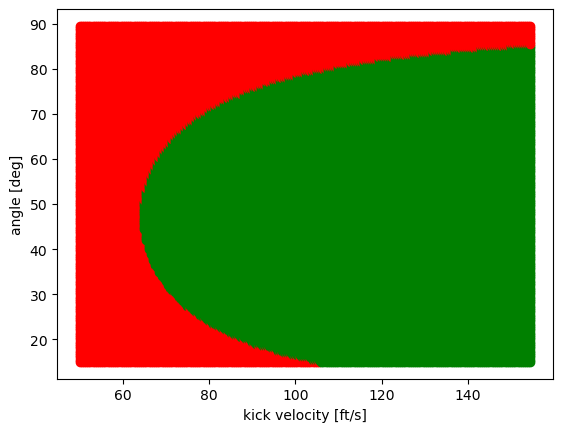

In [72]:
%%prun
u=50.0 #starting value for u
while u < 155:
    theta=15.0 # starting value for theta needs to be inside loop
    while theta < 90.0: 
        plotting_successes_failures_constant_distance(u,theta,40) #plot one point at a time
        theta=theta+0.5 #adding 5 our step size
    u=u+0.5 #adding 5 our step size
pyplot.xlabel("kick velocity [ft/s]") # set x-axis label
pyplot.ylabel("angle [deg]") #make a y-axis label
pyplot.show()

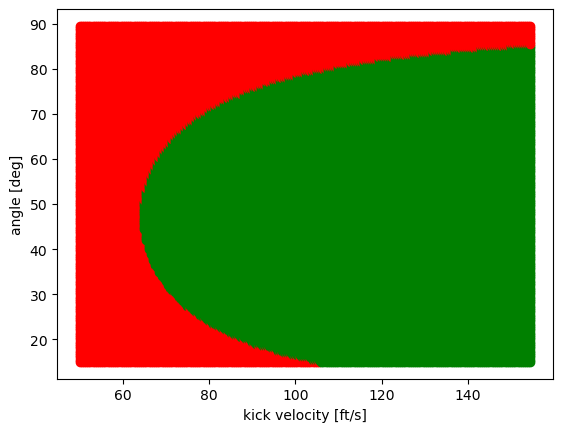

peak memory: 735.52 MiB, increment: 408.53 MiB


In [11]:
%%memit
u=50.0 #starting value for u
while u < 155:
    theta=15.0 # starting value for theta needs to be inside loop
    while theta < 90.0: 
        plotting_successes_failures_constant_distance(u,theta,40) #plot one point at a time
        theta=theta+0.5 #adding 5 our step size
    u=u+0.5 #adding 5 our step size
pyplot.xlabel("kick velocity [ft/s]") # set x-axis label
pyplot.ylabel("angle [deg]") #make a y-axis label
pyplot.show()

# Code assessment

This code is very inefficient. It takes 93.712 total seconds to run (which feels like forever for the amount of information). And, if I'm reading the prun output correctly, the single longest function call within the cell was used to "draw" the plot, totaling 2.875 seconds. And in terms of memory, the peak memory usage was 735.52 MiB and the memory consumed is 408.53 MiB.

# Revised code

In [67]:
def color_check(kick_velocity_in_feet_per_second, kick_angle_in_degrees, kick_distance_in_yards):
    height=height_at_field_goal(kick_velocity_in_feet_per_second, kick_angle_in_degrees, kick_distance_in_yards)
    colors = []
    for i in range(len(height)):
        if height[i] > convert_feet_to_meters(10.0):
            #print("successful attempt")#
            colors.append("green")
        else:
            #print("failed attempt")#
            colors.append("red")  
    return colors
          
#function plots the kick result velocity vs. angle
# input: distance in yards, kick velocity in ft/s, kick angle in deg
#output: a point in v vs. theta graph 
def plotting(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, plot_kick_distance_in_yards):
    col = color_check(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, plot_kick_distance_in_yards)
    pyplot.scatter(plot_kick_velocity_in_feet_per_second, plot_kick_angle_in_degrees, color=col)

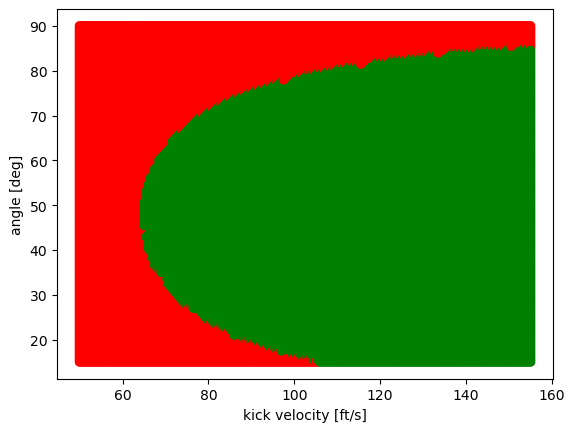

peak memory: 170.52 MiB, increment: 13.11 MiB
 

In [73]:
%%prun
%%memit
#there are 211 possible us
#there are 151 possible thetas
#set up arrays of possible variable combinations
us = np.arange(50.0,155.5, 0.5)
us = np.tile(us, 151)
thetas = np.arange(15.0, 90.5, 0.5)
thetas = np.tile(thetas, 211)
dists = np.array([40])
dists = np.tile(dists, 31861)

#plot all of those compinations
plotting(us,thetas,dists)
pyplot.xlabel("kick velocity [ft/s]") # set x-axis label
pyplot.ylabel("angle [deg]") #make a y-axis label
pyplot.show()

# Revised code assessment

Using the new code (as well as a couple new function) is much more efficient: 

The cell took a total time of 3.148 seconds, which is *much* smaller than the previous 93.712 seconds

The longest call is only 1.9 seconds {built-in method gc.collect}, which is again, faster than the 2.875 second longest call for the previous code

The cell also only needed a peak memory of 186.3 MiB and a total memory consumed of 10.42 MiB, which is, again, *much* better than the previous 735.52 MiB and 408.53 MiB

Therefore, the run-time and memory usage of my new code is lower, utilizing vectorization in both the functions and the plotting is a better method for writing code